In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [25]:
data = pd.read_csv("C:/Users/Adamin/Desktop/DMML-Project/Obesity/Nutrition__Physical_Activity__and_Obesity.csv")

In [26]:
print(data.dtypes)

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

In [27]:
data

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88624,2021,2021,ND,North Dakota,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.47531977900047, -100.11842104899966)",FV,FV1,Q019,VALUE,38,Gender,Male,GEN,MALE
88625,2021,2021,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
88626,2021,2021,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Income,"$75,000 or greater",INC,INC75PLUS
88627,2021,2021,UT,Utah,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",FV,FV1,Q018,VALUE,49,Income,"$50,000 - $74,999",INC,INC5075


In [28]:
data['Class'].replace(['Physical Activity','Fruits and Vegetables','Obesity / Weight Status'],
                        [0,0,1], inplace=True)
data['Class']

0        0
1        1
2        1
3        1
4        0
        ..
88624    0
88625    0
88626    0
88627    0
88628    0
Name: Class, Length: 88629, dtype: int64

In [29]:
target_name = 'Class'
data_target = data[target_name]
X = data.iloc[:,[0,1,10,11,14,15,16,28]]
X=X.dropna()
X
data_target = data_target.loc[1:79851,]

In [30]:
train, test, target, target_test = train_test_split(X, data_target, test_size=0.2, random_state=0)

In [31]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

In [76]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,LocationID,0.000001
4,High_Confidence_Limit,-0.000002
2,Data_Value_Alt,-0.000002
3,Low_Confidence_Limit,-0.000002
5,Sample_Size,-0.000002
0,YearEnd,-0.000134
1,Data_Value,-0.000134


In [33]:
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

63.09

In [34]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

63.8

In [35]:
from sklearn.metrics import confusion_matrix
predicted=logreg.predict(test)
predicted1=logreg.predict(train)

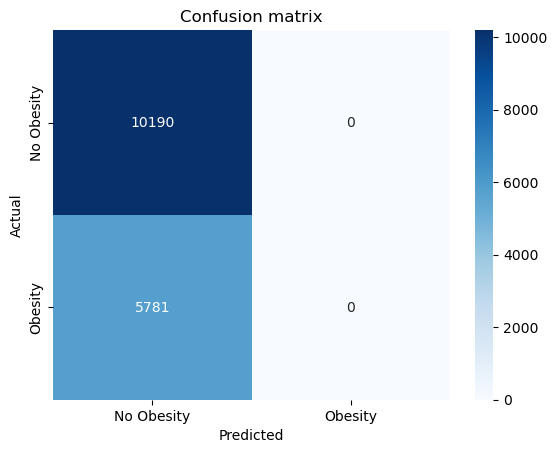

In [36]:
import seaborn as sns
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.yticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.title('Confusion matrix')
plt.show()

In [62]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

63.09

In [38]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

63.8

In [39]:
predicted=perceptron.predict(test)
predicted1=perceptron.predict(train)
confusion_matrix(target_test, predicted)

array([[10190,     0],
       [ 5781,     0]], dtype=int64)

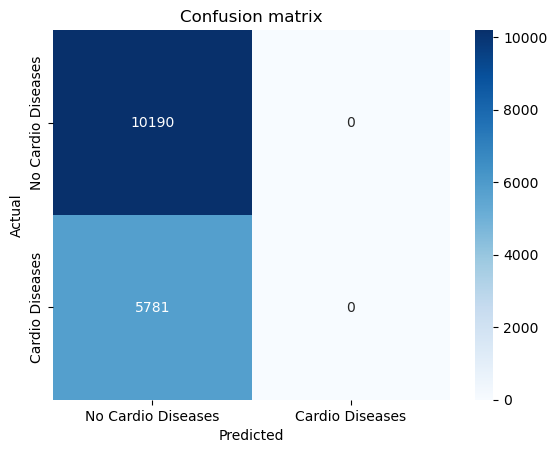

In [40]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.yticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.title('Confusion matrix')
plt.show()

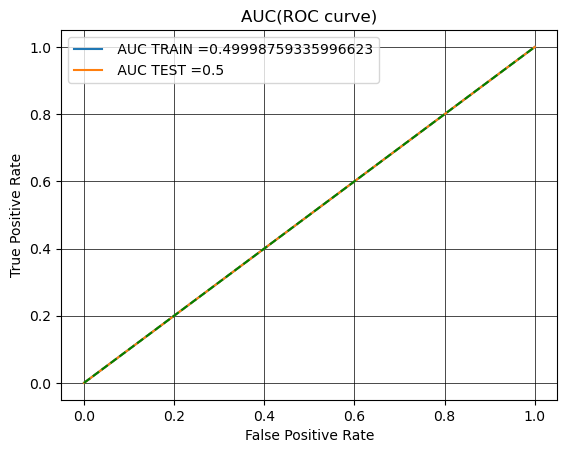

In [41]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

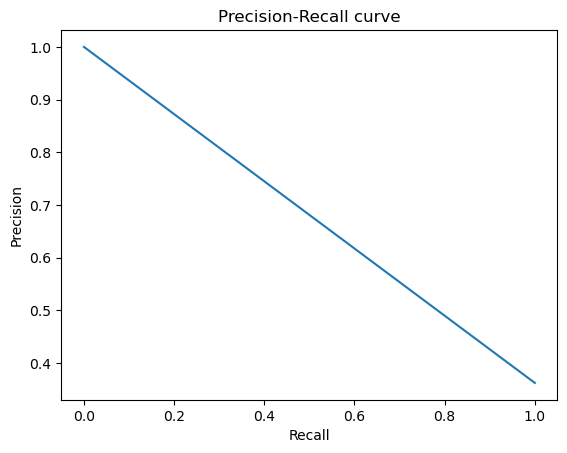

In [42]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [43]:
gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

63.65

In [44]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

64.31

In [45]:
predicted=gaussian.predict(test)
predicted1=gaussian.predict(train)
confusion_matrix(target_test, predicted)

array([[9324,  866],
       [4834,  947]], dtype=int64)

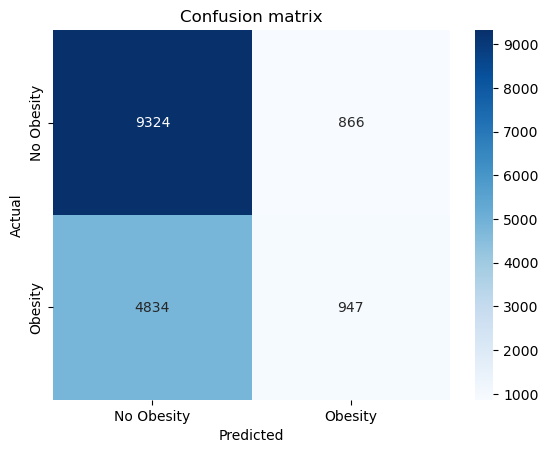

In [46]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.yticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.title('Confusion matrix')
plt.show()

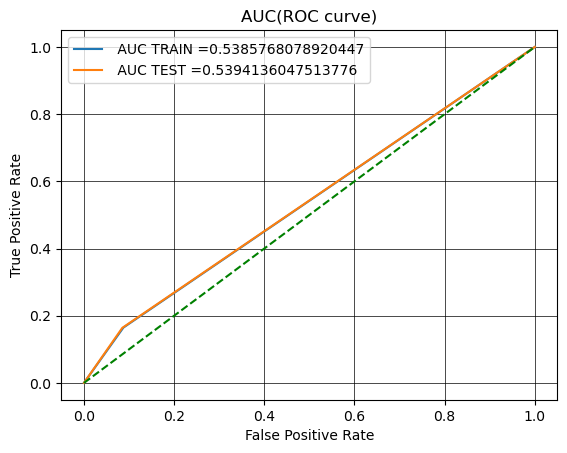

In [47]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

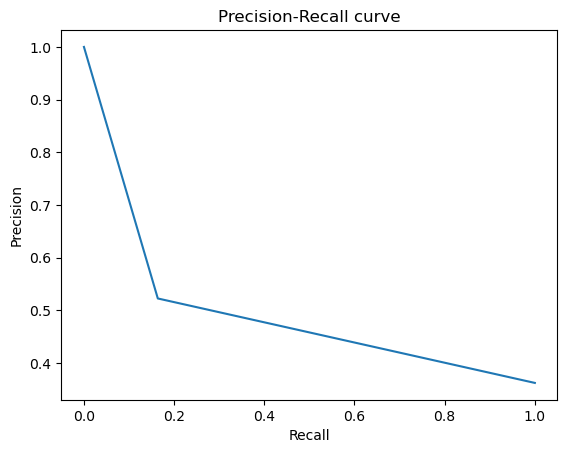

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [49]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

100.0

In [50]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

55.56

In [51]:
predicted=decision_tree.predict(test)
predicted1=decision_tree.predict(train)
confusion_matrix(target_test, predicted)

array([[6569, 3621],
       [3477, 2304]], dtype=int64)

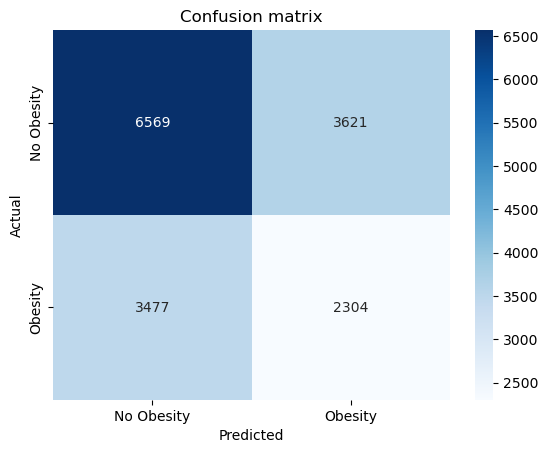

In [52]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.yticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.title('Confusion matrix')
plt.show()

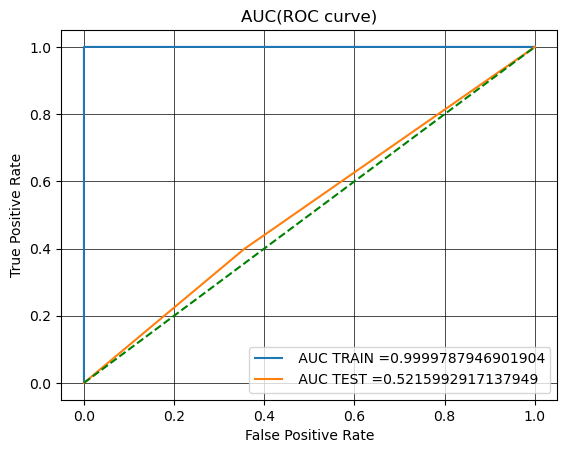

In [53]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

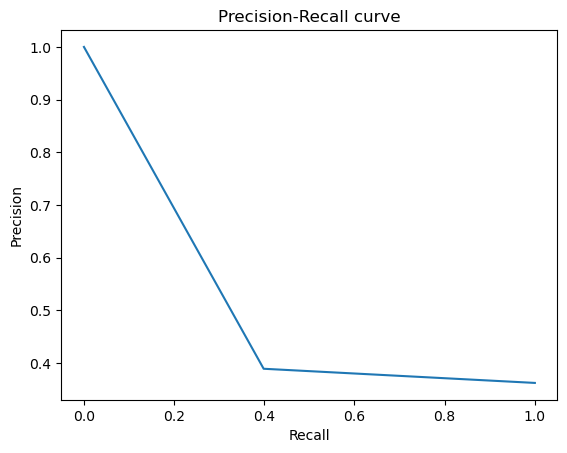

In [54]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [55]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 300}


In [56]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

63.47

In [57]:
predicted=random_forest.predict(test)
predicted1=random_forest.predict(train)
confusion_matrix(target_test, predicted)

array([[8445, 1745],
       [4089, 1692]], dtype=int64)

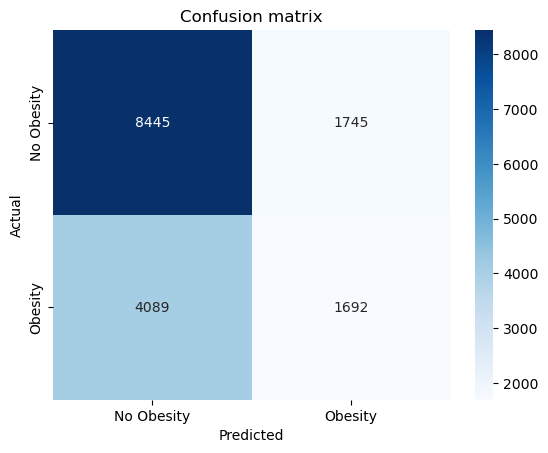

In [58]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.yticks([0.5, 1.5], ['No Obesity', 'Obesity'])
plt.title('Confusion matrix')
plt.show()

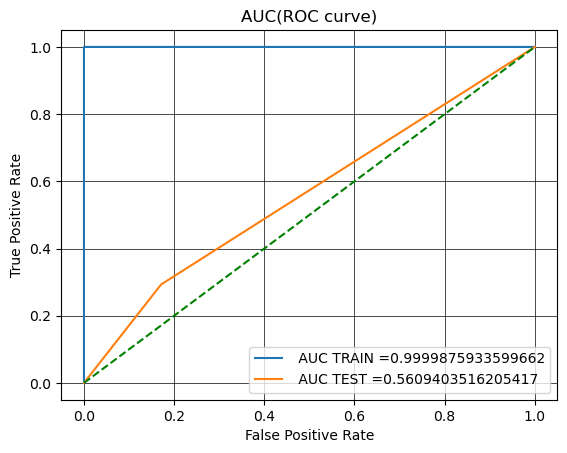

In [38]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

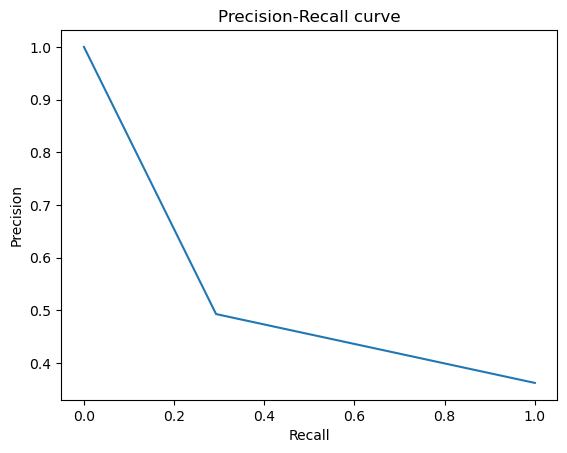

In [39]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Perceptron', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest'],
    
    'Score_train': [acc_log, acc_perceptron, acc_gaussian, acc_decision_tree, acc_random_forest],
    'Score_test': [acc_test_log, acc_test_perceptron, acc_test_gaussian, acc_test_decision_tree, acc_test_random_forest]})

In [65]:
#creating a function to evaluate the model

def evaluate_model(models, train, target, test, target_test):
    model.fit(train, target)
    target_pred = model.predict(train)
    target_test_pred = model.predict(test)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(target, target_pred)],
                        'train_precision': [precision_score(target, target_pred)],
                        'train_recall': [recall_score(target, target_pred)],
                        'train_f1': [f1_score(target, target_pred)],
                        'train_roc_auc': [roc_auc_score(target, target_pred)],
                        
                        'test_accuracy': [accuracy_score(target_test, target_test_pred)],
                        'test_precision': [precision_score(target_test, target_test_pred)],
                        'test_recall': [recall_score(target_test, target_test_pred)],
                        'test_f1': [f1_score(target_test, target_test_pred)],
                        'test_roc_auc': [roc_auc_score(target_test, target_test_pred)]})
    return df

In [66]:
#Finding Precision, Accuracy, F-score, Recall and ROC-AUC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Perceptron': Perceptron(),
    'Naive Bayes': GaussianNB(),
}

results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, train, target, test, target_test)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
results.sort_values(by='test_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,model
4,0.636475,0.524105,0.164596,0.250516,0.538577,0.643103,0.522339,0.163812,0.249407,0.539414,Naive Bayes
0,0.630855,0.000000,0.000000,0.000000,0.499975,0.638031,0.000000,0.000000,0.000000,0.500000,Logistic Regression
3,0.630870,0.000000,0.000000,0.000000,0.499988,0.638031,0.000000,0.000000,0.000000,0.500000,Perceptron
2,0.999984,0.999958,1.000000,0.999979,0.999988,0.631457,0.484761,0.288877,0.362020,0.557343,Random Forest
1,0.999984,1.000000,0.999958,0.999979,0.999979,0.554630,0.387765,0.398028,0.392830,0.520751,Decision Tree


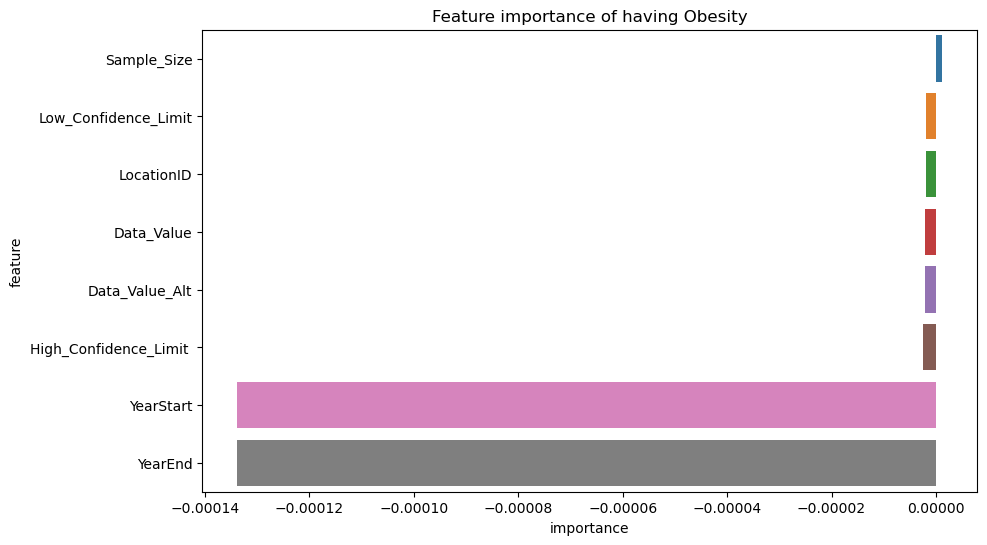

In [75]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': logreg.coef_[0]})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having Obesity')
plt.show()

In [72]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,Random Forest,100.00,63.47
3,Decision Tree Classifier,100.00,55.56
2,Naive Bayes,63.65,64.31
0,Logistic Regression,63.09,63.80
1,Perceptron,63.09,63.80


In [73]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
2,Naive Bayes,63.65,64.31,0.66
0,Logistic Regression,63.09,63.80,0.71
1,Perceptron,63.09,63.80,0.71
4,Random Forest,100.00,63.47,36.53
3,Decision Tree Classifier,100.00,55.56,44.44


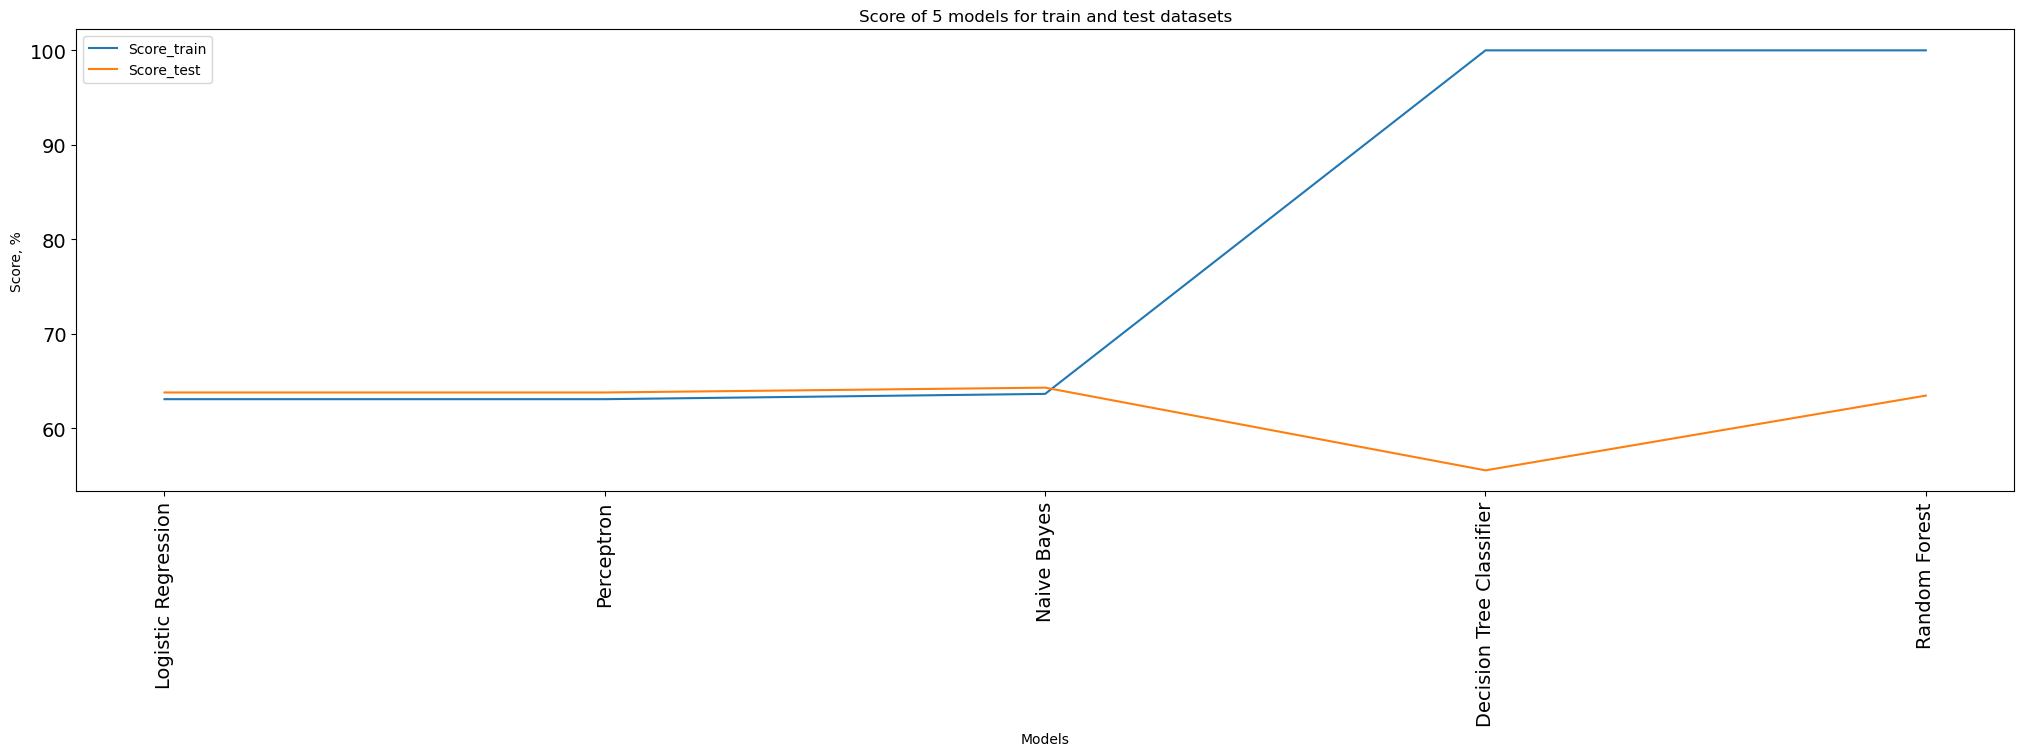

In [74]:
# Plotting the accuracy of each model
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 5 models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()